In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Importation df_netflix

df_netflix = pd.read_csv("netflix_titles.csv")

# Affichage

df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 Afficher, dans un graphique, le nombre de contenus appartenant à chacun des deux types ("TV Show" et "Movie").

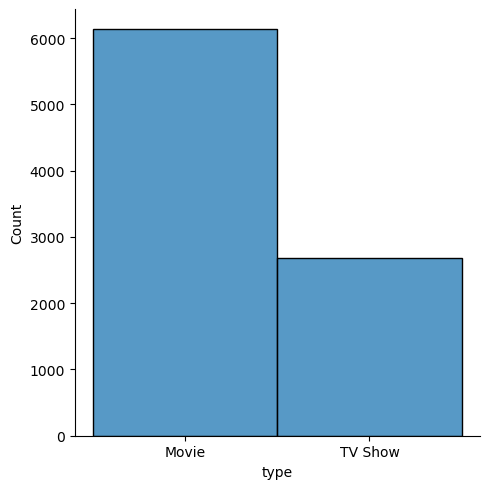

In [5]:
# Affichage 
sns.displot(df_netflix['type']);

In [4]:
# Importation 
df_imdb =pd.read_csv('imdb.csv')
df_imdbr = pd.read_csv('imdbr.csv')
df_imdb = df_imdb.drop(['isAdult'], axis = 1)
df_imdb = df_imdb.merge(right = df_imdbr, on = ['tconst'])
df_imdb.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15332\4146378705.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_imdb =pd.read_csv('imdb.csv')


,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,1894,\N,1,"Documentary,Short",5.6,1694
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,\N,5,"Animation,Short",6.0,210
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,1892,\N,4,"Animation,Comedy,Romance",6.5,1441
3,tt0000004,short,Un bon bock,Un bon bock,1892,\N,12,"Animation,Short",6.1,122
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,\N,1,"Comedy,Short",6.1,2240


In [5]:
# Fusion
dic = {'primaryTitle':'title',
      'startYear': 'release_year'}

df_imdb = df_imdb.rename(dic, axis = 1)

all_content = df_netflix.merge(right = df_imdb, on = ['title','release_year'], how = 'inner')

all_content.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States","September 1, 2021",1961,TV-14,156 min,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",tt0054953,movie,The Guns of Navarone,\N,158,"Action,Adventure,Drama",7.5,45871
1,s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,"April 1, 2021",1964,G,173 min,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,tt0058385,movie,My Fair Lady,\N,170,"Drama,Family,Musical",7.8,87279
2,s1700,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,TV-G,120 min,"Children & Family Movies, Classic Movies, Come...",Two war buddies fall for two sisters and follo...,tt0047673,movie,White Christmas,\N,120,"Comedy,Musical,Romance",7.6,34619
3,s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,"June 18, 2020",1958,TV-14,73 min,"Classic Movies, Dramas, International Movies",A Cairo newsstand vendor's fantasies morph int...,tt0051390,movie,Bab el hadid,\N,77,"Crime,Drama",7.6,3670
4,s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,"June 18, 2020",1956,TV-14,104 min,"Classic Movies, Dramas, International Movies",A fisherman returns home after a three-year ab...,tt0049761,movie,Siraa Fil-Mina,\N,120,"Drama,Romance,Thriller",6.8,459



Ajouter à all_content une colonne "is_action" qui prendra la valeur True si un contenu appartient à la catégorie Action, et False sinon.

In [217]:
all_content['is_action'] = all_content['listed_in'].apply(lambda i : True if i == 'Action' else False)

all_content.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes,is_action
0,s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States","September 1, 2021",1961,TV-14,156 min,...,"During World War II, British forces launch an ...",tt0054953,movie,The Guns of Navarone,\N,158,"Action,Adventure,Drama",7.5,45871,False
1,s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,"April 1, 2021",1964,G,173 min,...,When a Cockney flower girl takes elocution les...,tt0058385,movie,My Fair Lady,\N,170,"Drama,Family,Musical",7.8,87279,False
2,s1700,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,TV-G,120 min,...,Two war buddies fall for two sisters and follo...,tt0047673,movie,White Christmas,\N,120,"Comedy,Musical,Romance",7.6,34619,False
3,s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,"June 18, 2020",1958,TV-14,73 min,...,A Cairo newsstand vendor's fantasies morph int...,tt0051390,movie,Bab el hadid,\N,77,"Crime,Drama",7.6,3670,False
4,s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,"June 18, 2020",1956,TV-14,104 min,...,A fisherman returns home after a three-year ab...,tt0049761,movie,Siraa Fil-Mina,\N,120,"Drama,Romance,Thriller",6.8,459,False


 Extraire de all_content un DataFrame nommé all_movies, contenant uniquement les films (contenus de type "Movie").

In [218]:
# Extraction
all_movies = all_content[all_content['type'] == 'Movie']

all_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes,is_action
0,s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States","September 1, 2021",1961,TV-14,156 min,...,"During World War II, British forces launch an ...",tt0054953,movie,The Guns of Navarone,\N,158,"Action,Adventure,Drama",7.5,45871,False
1,s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,"April 1, 2021",1964,G,173 min,...,When a Cockney flower girl takes elocution les...,tt0058385,movie,My Fair Lady,\N,170,"Drama,Family,Musical",7.8,87279,False
2,s1700,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,TV-G,120 min,...,Two war buddies fall for two sisters and follo...,tt0047673,movie,White Christmas,\N,120,"Comedy,Musical,Romance",7.6,34619,False
3,s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,"June 18, 2020",1958,TV-14,73 min,...,A Cairo newsstand vendor's fantasies morph int...,tt0051390,movie,Bab el hadid,\N,77,"Crime,Drama",7.6,3670,False
4,s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,"June 18, 2020",1956,TV-14,104 min,...,A fisherman returns home after a three-year ab...,tt0049761,movie,Siraa Fil-Mina,\N,120,"Drama,Romance,Thriller",6.8,459,False


In [219]:
# Créer la variable duree

all_movies[['duree', 'min']] = all_movies['duration'].str.split(' ', 1, expand=True)

all_movies = all_movies.drop(['min'], axis = 1)

all_movies=all_movies.dropna(subset = 'duree')

all_movies['duree'] = all_movies['duree'].astype('int')

all_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes,is_action,duree
0,s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States","September 1, 2021",1961,TV-14,156 min,...,tt0054953,movie,The Guns of Navarone,\N,158,"Action,Adventure,Drama",7.5,45871,False,156
1,s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,"April 1, 2021",1964,G,173 min,...,tt0058385,movie,My Fair Lady,\N,170,"Drama,Family,Musical",7.8,87279,False,173
2,s1700,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,TV-G,120 min,...,tt0047673,movie,White Christmas,\N,120,"Comedy,Musical,Romance",7.6,34619,False,120
3,s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,"June 18, 2020",1958,TV-14,73 min,...,tt0051390,movie,Bab el hadid,\N,77,"Crime,Drama",7.6,3670,False,73
4,s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,"June 18, 2020",1956,TV-14,104 min,...,tt0049761,movie,Siraa Fil-Mina,\N,120,"Drama,Romance,Thriller",6.8,459,False,104


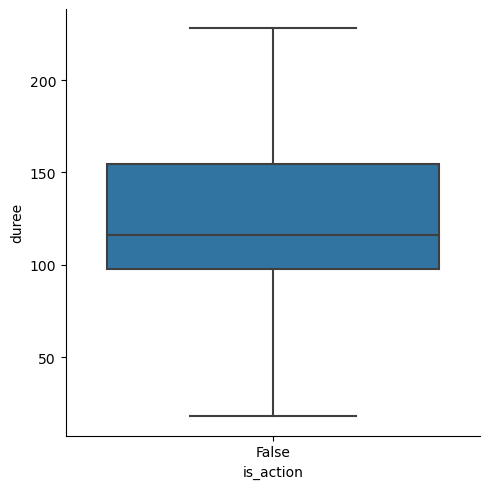

In [220]:
# Afficher le boxplot pour la distribution de la variable 'duree'
sns.catplot(kind = 'box', x = 'is_action', y = 'duree', data = all_movies);



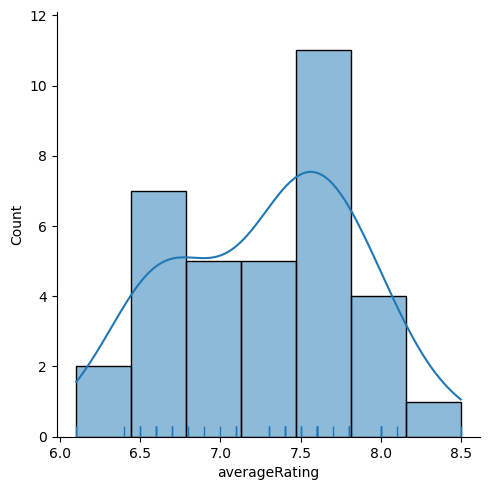

In [221]:
# Analyse univarié de la variable  "averageRating"
sns.displot(all_movies[ "averageRating"], kind = 'hist', kde=True, rug = True);

In [65]:
all_movies.dtypes

show_id            object
type               object
title              object
director           object
cast               object
country            object
date_added         object
release_year       object
rating             object
duration           object
listed_in          object
description        object
tconst             object
titleType          object
originalTitle      object
endYear            object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
is_action            bool
duree               int32
dtype: object

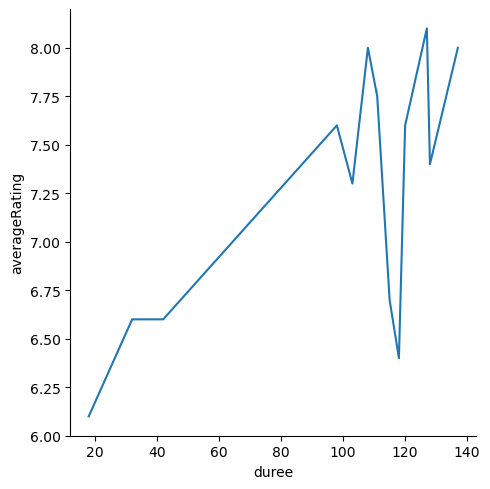

In [77]:
sns.relplot(kind='line',x = 'duree', y='averageRating', data= all_movies[(all_movies['duree']<160) & (all_movies['country'] == 'United States')]);

In [156]:
directors = all_content['director'].str.split(', ', expand=True).stack().reset_index(drop=True)
all_content.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes,year
0,s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States","September 1, 2021",1961,TV-14,156 min,...,"During World War II, British forces launch an ...",tt0054953,movie,The Guns of Navarone,\N,158,"Action,Adventure,Drama",7.5,45871,2021
1,s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,"April 1, 2021",1964,G,173 min,...,When a Cockney flower girl takes elocution les...,tt0058385,movie,My Fair Lady,\N,170,"Drama,Family,Musical",7.8,87279,2021
2,s1700,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,TV-G,120 min,...,Two war buddies fall for two sisters and follo...,tt0047673,movie,White Christmas,\N,120,"Comedy,Musical,Romance",7.6,34619,2020
3,s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,"June 18, 2020",1958,TV-14,73 min,...,A Cairo newsstand vendor's fantasies morph int...,tt0051390,movie,Bab el hadid,\N,77,"Crime,Drama",7.6,3670,2020
4,s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,"June 18, 2020",1956,TV-14,104 min,...,A fisherman returns home after a three-year ab...,tt0049761,movie,Siraa Fil-Mina,\N,120,"Drama,Romance,Thriller",6.8,459,2020


In [157]:

directors.value_counts()

Youssef Chahine       4
Lekh Tandon           3
John Huston           2
Dino Risi             2
J. Lee Thompson       1
William Wyler         1
Raj Kapoor            1
John Ford             1
Norman Jewison        1
Marek Piwowski        1
John Sturges          1
Nicholas Ray          1
Henry Hathaway        1
Frank Capra           1
Hugh Stewart          1
Roy Boulting          1
Anthony Veiller       1
Roman Polanski        1
Carol Reed            1
Sergio Leone          1
George Cukor          1
Lewis Milestone       1
Stanley Kubrick       1
James Mangold         1
Radhu Karmakar        1
Charles Walters       1
Vincente Minnelli     1
Fred M. Wilcox        1
David Lean            1
Stuart Rosenberg      1
Ken Hughes            1
Richard Brooks        1
Arthur Penn           1
Michael Curtiz        1
Stanisław Różewicz    1
dtype: int64

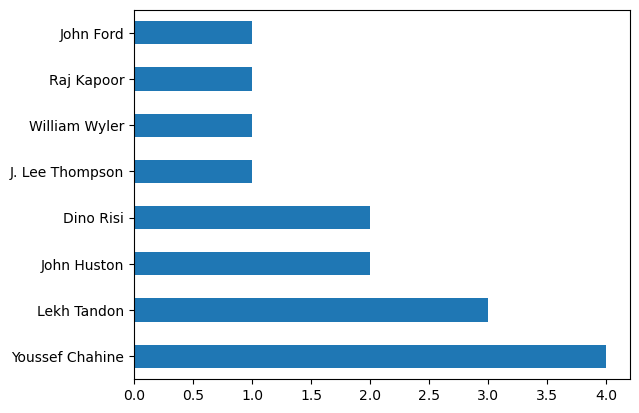

In [112]:
directors.value_counts().nlargest(8).plot(kind='barh');


In [235]:
all_content['year'] = pd.to_datetime(all_content['date_added']).dt.year

all_content.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes,year
0,s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States","September 1, 2021",1961,TV-14,156 min,...,"During World War II, British forces launch an ...",tt0054953,movie,The Guns of Navarone,\N,158,"Action,Adventure,Drama",7.5,45871,2021
1,s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,"April 1, 2021",1964,G,173 min,...,When a Cockney flower girl takes elocution les...,tt0058385,movie,My Fair Lady,\N,170,"Drama,Family,Musical",7.8,87279,2021
2,s1700,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,TV-G,120 min,...,Two war buddies fall for two sisters and follo...,tt0047673,movie,White Christmas,\N,120,"Comedy,Musical,Romance",7.6,34619,2020
3,s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,"June 18, 2020",1958,TV-14,73 min,...,A Cairo newsstand vendor's fantasies morph int...,tt0051390,movie,Bab el hadid,\N,77,"Crime,Drama",7.6,3670,2020
4,s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,"June 18, 2020",1956,TV-14,104 min,...,A fisherman returns home after a three-year ab...,tt0049761,movie,Siraa Fil-Mina,\N,120,"Drama,Romance,Thriller",6.8,459,2020
5,s2374,Movie,Saladin,Youssef Chahine,"Ahmad Mazhar, Salah Zo El Faqqar, Nadia Lotfi,...",Egypt,"June 18, 2020",1963,TV-MA,194 min,...,The Sultan of Egypt and Syria launches a campa...,tt0057357,movie,El Naser Salah el Dine,\N,186,"Action,Adventure,Drama",7.8,2224,2020
6,s2376,Movie,The Blazing Sun,Youssef Chahine,"Omar Sharif, Faten Hamama, Zaki Rostom, Farid ...",Egypt,"June 18, 2020",1954,TV-14,116 min,...,Competition between sugar cane producers turns...,tt0044429,movie,Siraa Fil-Wadi,\N,105,"Crime,Drama,Romance",7.4,1022,2020
7,s5392,Movie,Amrapali,Lekh Tandon,"Vyjayantimala, Sunil Dutt, Prem Nath, Bipin Gu...",India,"July 1, 2017",1966,TV-PG,116 min,...,In the age of Buddha and his philosophy of non...,tt0060104,movie,Amrapali,\N,119,"Fantasy,Musical",6.7,189,2017
8,s5401,Movie,Professor,Lekh Tandon,"Shammi Kapoor, Kalpana, Lalita Pawar, Parveen ...",India,"July 1, 2017",1962,TV-PG,163 min,...,A college grad in need of money must disguise ...,tt0056379,movie,Professor,\N,166,"Comedy,Drama,Musical",7.1,234,2017
9,s5462,Movie,Prince,Lekh Tandon,"Shammi Kapoor, Vyjayantimala, Rajendra Nath, A...",India,"June 1, 2017",1969,TV-PG,152 min,...,"To better himself, a spoiled prince temporaril...",tt0064842,movie,Prince,\N,\N,"Musical,Romance",7.1,139,2017


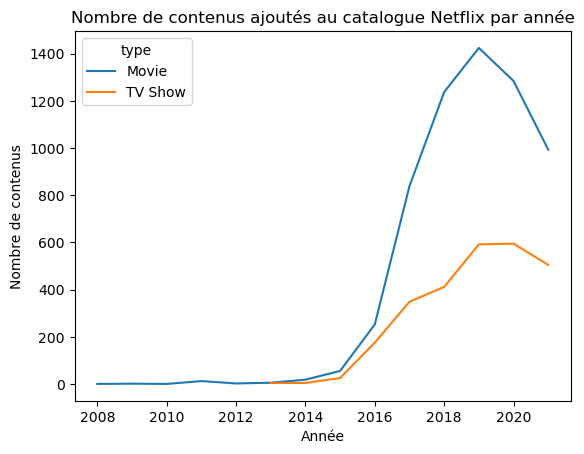

In [170]:
# Regrouper les données par année et par type de contenu et compter le nombre de contenus dans chaque groupe
content_by_year = all_content.groupby(['year', 'type'])['show_id'].count()
content_by_year.unstack().plot(kind='line')
plt.title("Nombre de contenus ajoutés au catalogue Netflix par année")
plt.ylabel("Nombre de contenus")
plt.xlabel("Année")

plt.show()

In [7]:
# Sélectionner tous les films et séries d'origine britannique
uk_movies = all_content.loc[(all_content['type'] == 'Movie') & (all_content['country'].str.contains('United Kingdom'))]
uk_series = all_content.loc[(all_content['type'] == 'TV Show') & (all_content['country'].str.contains('United Kingdom'))]

uk_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States","September 1, 2021",1961,TV-14,156 min,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",tt0054953,movie,The Guns of Navarone,\N,158,"Action,Adventure,Drama",7.5,45871
12,s6474,Movie,Chitty Chitty Bang Bang,Ken Hughes,"Dick Van Dyke, Sally Ann Howes, Lionel Jeffrie...","United Kingdom, United States","January 1, 2020",1968,G,146 min,"Children & Family Movies, Classic Movies, Come...",Quirky inventor Caractacus Potts and his famil...,tt0062803,movie,Chitty Chitty Bang Bang,\N,144,"Adventure,Family,Fantasy",6.9,41658
14,s6620,Movie,Doctor Zhivago,David Lean,"Omar Sharif, Julie Christie, Geraldine Chaplin...","United States, Italy, United Kingdom, Liechten...","November 1, 2019",1965,PG-13,200 min,"Classic Movies, Dramas, Romantic Movies",A young physician and his beautiful mistress g...,tt0059113,movie,Doctor Zhivago,\N,197,"Drama,Romance,War",8.0,70540
19,s7333,Movie,Lolita,Stanley Kubrick,"James Mason, Shelley Winters, Peter Sellers, S...","United Kingdom, United States","November 1, 2019",1962,R,153 min,"Classic Movies, Dramas, Romantic Movies","In this black comedy, an English professor mar...",tt0056193,movie,Lolita,\N,153,"Crime,Drama,Romance",7.6,93786
33,s8641,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...,tt0037404,movie,Tunisian Victory,\N,75,"Documentary,War",6.6,532


In [244]:
# Trier les DataFrames dans l'ordre décroissant en fonction du nombre de votes
uk_movies = uk_movies.sort_values(by='numVotes', ascending=False)
uk_series = uk_series.sort_values(by='numVotes', ascending=False)

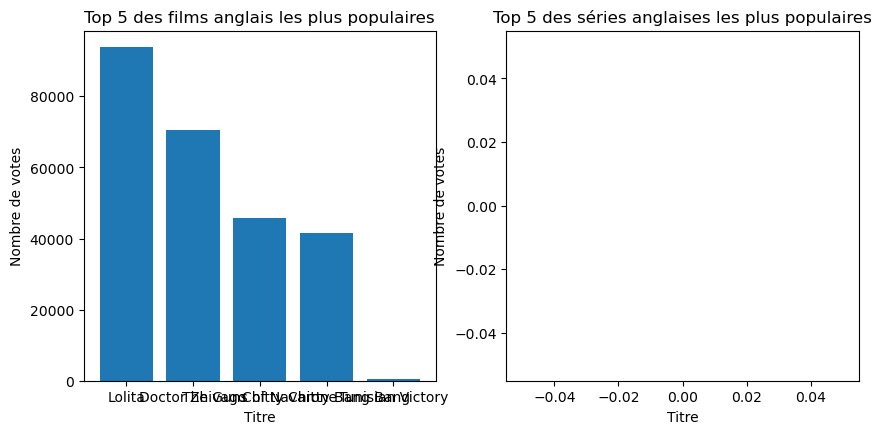

In [245]:
# Sélectionner les 5 premiers éléments de chaque DataFrame trié par nombre de votes décroissant

top_5_movies = uk_movies.head(5)
top_5_series = uk_series.head(5)

# Tracer un graphique en barres horizontales du nombre de votes pour chaque série ou film

plt.figure(figsize = (10,10))

plt.subplot(221)
plt.bar(top_5_movies.title, top_5_movies.numVotes)
plt.title('Top 5 des films anglais les plus populaires')
plt.ylabel('Nombre de votes')
plt.xlabel('Titre')

plt.subplot(222)
plt.bar(top_5_series.title, top_5_series.numVotes)
plt.title('Top 5 des séries anglaises les plus populaires')
plt.ylabel('Nombre de votes')
plt.xlabel('Titre')

plt.show()

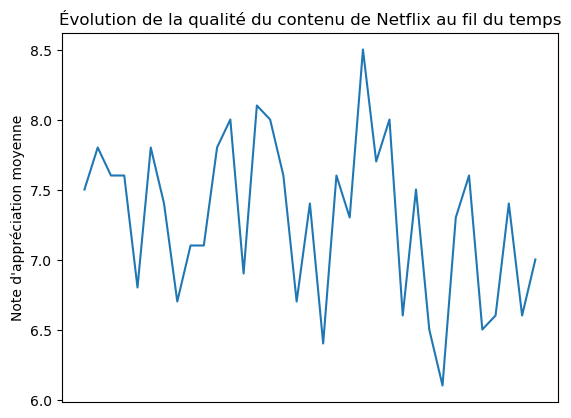

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes,year
0,s178,Movie,The Guns of Navarone,J. Lee Thompson,"Gregory Peck, David Niven, Anthony Quinn, Stan...","United Kingdom, United States","September 1, 2021",1961,TV-14,156 min,...,"During World War II, British forces launch an ...",tt0054953,movie,The Guns of Navarone,\N,158,"Action,Adventure,Drama",7.5,45871,2021
1,s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,"April 1, 2021",1964,G,173 min,...,When a Cockney flower girl takes elocution les...,tt0058385,movie,My Fair Lady,\N,170,"Drama,Family,Musical",7.8,87279,2021
2,s1700,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,TV-G,120 min,...,Two war buddies fall for two sisters and follo...,tt0047673,movie,White Christmas,\N,120,"Comedy,Musical,Romance",7.6,34619,2020
3,s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,"June 18, 2020",1958,TV-14,73 min,...,A Cairo newsstand vendor's fantasies morph int...,tt0051390,movie,Bab el hadid,\N,77,"Crime,Drama",7.6,3670,2020
4,s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,"June 18, 2020",1956,TV-14,104 min,...,A fisherman returns home after a three-year ab...,tt0049761,movie,Siraa Fil-Mina,\N,120,"Drama,Romance,Thriller",6.8,459,2020


In [248]:

# Tracer un graphique en ligne de l'évolution de la qualité du contenu au fil du temps


all_content['release_year'] = all_content['release_year'].astype('int')

plt.plot(all_content.averageRating)
plt.title("Évolution de la qualité du contenu de Netflix au fil du temps")
plt.ylabel("Note d'appréciation moyenne")
plt.xticks([])
plt.show()
all_content.head()


In [16]:
# Sélectionner les éléments de all_content qui correspondent à des productions anglaises ayant obtenu une note moyenne supérieure à 8
uk_high_quality = all_content.loc[(all_content['country'].str.contains('United Kingdom')) & (all_content['averageRating'] > 8)]

# Regrouper les éléments par acteur/actrice et compter le nombre de fois que chaque acteur/actrice apparaît dans les productions sélectionnées
acteurs = uk_high_quality['cast'].str.split(', ', expand=True).stack().reset_index(drop=True)

# Afficher le Top 15 des acteurs/actrices les plus présents
acteurs.value_counts().nlargest(15)

Series([], dtype: int64)

In [150]:


# Regrouper les éléments par acteur/actrice et compter le nombre de fois que chaque acteur/actrice apparaît dans les productions sélectionnées
actor_counts = uk_high_quality.groupby('cast')['title'].count()

# Trier les résultats dans l'ordre décroissant en fonction du nombre d'apparitions et sélectionner les 15 premiers éléments
top_15_actors = actor_counts.sort_values(ascending=False).head(15)

print(top_15_actors)

Series([], Name: title, dtype: int64)


In [11]:
uk_high_quality.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tconst,titleType,originalTitle,endYear,runtimeMinutes,genres,averageRating,numVotes
